# Shut the Box

## Step 0: Utils for Jupyter Notebooks

### Add button to Show/Hide code (to focus on outputs)

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show Code"></form>''')

### Add magic command to store python variables in csv file

In [27]:
# credit to sirex, https://github.com/ipython/ipython/issues/6701
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

## Step 1: Generate models

In [43]:
# Edit this cell to define parameters for your model...

boards = 6 # Number of boards to use
sides = 6 # Number of sides per die
die = 1 # Number of die to roll each round
strategy = 1 # Board covering strategy to use (see strategy_lookup in stb/pp_fns.py for more info)

max_score = boards * (boards+1) // 2

In [37]:
%%writetemplate ShutTheBox/stb_params.csv
b, {boards}
d, {sides}
ndie, {die}
strategy, {strategy}

In [38]:
!python utils/pyprism.py ShutTheBox/stb.pyprism ShutTheBox/stb6test.prism ShutTheBox/stb_params.csv

Model generated successfully at ShutTheBox\stb6test.prism


## Step 2: Check properties, run experiments, export data

### Does the game eventually always terminate?

In [39]:
!prism ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop 1

PRISM-games

Version: 3.0 (based on PRISM 4.6)
Date: Sun Nov 15 14:55:10 GMT 2020
Hostname: DESKTOP-LDYER
Memory limits: cudd=1g, java(heap)=910.5m
Command line: prism-games ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop 1

Parsing model file "ShutTheBox/stb6test.prism"...

Type:        CSG
Modules:     player1 board1 board2 board3 board4 board5 board6 
Variables:   state die b1 b2 b3 b4 b5 b6 

Switching to explicit engine, which supports CSGs...

Parsing properties file "ShutTheBox/stb6.props"...

22 properties:
(1) <<p1>>P>=1 [ F game_over ]
(2) <<p1>>Pmin=? [ F game_over&score=k ]
(3) <<p1>>Pmax=? [ F game_over&score=k ]
(4) <<p1>>Pmax=? [ F game_over&score=k ]-<<p1>>Pmin=? [ F game_over&score=k ]
(5) <<p1>>Pmin=? [ F game_over&score<=k ]
(6) <<p1>>Pmax=? [ F game_over&score<=k ]
(7) <<p1>>R{"total_boards"}min=? [ F game_over ]
(8) <<p1>>R{"total_boards"}max=? [ F game_over ]
(9) <<p1>>R{"no_rolls"}max=? [ F game_over ]
(10) <<p1>>R{"no_rolls"}min=? [ F game_over ]
(11) <<p1

### Probability of obtaining each score 

In [50]:
prob_score_file = "ShutTheBox/data/prob_score.csv"

!prism ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop 2 -const k=1:{max_score} -exportresults {prob_score_file}:csv

PRISM-games

Version: 3.0 (based on PRISM 4.6)
Date: Sun Nov 15 15:16:19 GMT 2020
Hostname: DESKTOP-LDYER
Memory limits: cudd=1g, java(heap)=910.5m
Command line: prism-games ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop 2 -const 'k=1:21' -exportresults 'ShutTheBox/data/prob_score.csv:csv'

Parsing model file "ShutTheBox/stb6test.prism"...

Type:        CSG
Modules:     player1 board1 board2 board3 board4 board5 board6 
Variables:   state die b1 b2 b3 b4 b5 b6 

Switching to explicit engine, which supports CSGs...

Parsing properties file "ShutTheBox/stb6.props"...

22 properties:
(1) <<p1>>P>=1 [ F game_over ]
(2) <<p1>>Pmin=? [ F game_over&score=k ]
(3) <<p1>>Pmax=? [ F game_over&score=k ]
(4) <<p1>>Pmax=? [ F game_over&score=k ]-<<p1>>Pmin=? [ F game_over&score=k ]
(5) <<p1>>Pmin=? [ F game_over&score<=k ]
(6) <<p1>>Pmax=? [ F game_over&score<=k ]
(7) <<p1>>R{"total_boards"}min=? [ F game_over ]
(8) <<p1>>R{"total_boards"}max=? [ F game_over ]
(9) <<p1>>R{"no_rolls"}max=? [ F

### Expected number of die rolls

In [41]:
!prism ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop 9

PRISM-games

Version: 3.0 (based on PRISM 4.6)
Date: Sun Nov 15 14:55:26 GMT 2020
Hostname: DESKTOP-LDYER
Memory limits: cudd=1g, java(heap)=910.5m
Command line: prism-games ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop 9

Parsing model file "ShutTheBox/stb6test.prism"...

Type:        CSG
Modules:     player1 board1 board2 board3 board4 board5 board6 
Variables:   state die b1 b2 b3 b4 b5 b6 

Switching to explicit engine, which supports CSGs...

Parsing properties file "ShutTheBox/stb6.props"...

22 properties:
(1) <<p1>>P>=1 [ F game_over ]
(2) <<p1>>Pmin=? [ F game_over&score=k ]
(3) <<p1>>Pmax=? [ F game_over&score=k ]
(4) <<p1>>Pmax=? [ F game_over&score=k ]-<<p1>>Pmin=? [ F game_over&score=k ]
(5) <<p1>>Pmin=? [ F game_over&score<=k ]
(6) <<p1>>Pmax=? [ F game_over&score<=k ]
(7) <<p1>>R{"total_boards"}min=? [ F game_over ]
(8) <<p1>>R{"total_boards"}max=? [ F game_over ]
(9) <<p1>>R{"no_rolls"}max=? [ F game_over ]
(10) <<p1>>R{"no_rolls"}min=? [ F game_over ]
(11) <<p1

### Probability of obtaining a score given a particular board is covered

In [45]:
for covered_board in range(1, b+1):
    !prism ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop {10+covered_board} -const k=1:{max_score} -exportresults ShutTheBox/data/score_given_{covered_board}.csv:csv

6 
Variables:   state die b1 b2 b3 b4 b5 b6 

Switching to explicit engine, which supports CSGs...

Parsing properties file "ShutTheBox/stb6.props"...

22 properties:
(1) <<p1>>P>=1 [ F game_over ]
(2) <<p1>>Pmin=? [ F game_over&score=k ]
(3) <<p1>>Pmax=? [ F game_over&score=k ]
(4) <<p1>>Pmax=? [ F game_over&score=k ]-<<p1>>Pmin=? [ F game_over&score=k ]
(5) <<p1>>Pmin=? [ F game_over&score<=k ]
(6) <<p1>>Pmax=? [ F game_over&score<=k ]
(7) <<p1>>R{"total_boards"}min=? [ F game_over ]
(8) <<p1>>R{"total_boards"}max=? [ F game_over ]
(9) <<p1>>R{"no_rolls"}max=? [ F game_over ]
(10) <<p1>>R{"no_rolls"}min=? [ F game_over ]
(11) <<p1>>Pmin=? [ F game_over&b1=1&score=k ]/<<p1>>Pmin=? [ F game_over&score=k ]
(12) <<p1>>Pmin=? [ F game_over&b2=1&score=k ]/<<p1>>Pmin=? [ F game_over&score=k ]
(13) <<p1>>Pmin=? [ F game_over&b3=1&score=k ]/<<p1>>Pmin=? [ F game_over&score=k ]
(14) <<p1>>Pmin=? [ F game_over&b4=1&score=k ]/<<p1>>Pmin=? [ F game_over&score=k ]
(15) <<p1>>Pmin=? [ F game_over&b

### Cumulative probability of a score

In [47]:
!prism ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop 6 -const k=1:{max_score} -exportresults ShutTheBox/data/cum_prob.csv:csv

PRISM-games

Version: 3.0 (based on PRISM 4.6)
Date: Sun Nov 15 15:06:54 GMT 2020
Hostname: DESKTOP-LDYER
Memory limits: cudd=1g, java(heap)=910.5m
Command line: prism-games ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop 6 -const 'k=1:21' -exportresults 'ShutTheBox/data/cum_prob.csv:csv'

Parsing model file "ShutTheBox/stb6test.prism"...

Type:        CSG
Modules:     player1 board1 board2 board3 board4 board5 board6 
Variables:   state die b1 b2 b3 b4 b5 b6 

Switching to explicit engine, which supports CSGs...

Parsing properties file "ShutTheBox/stb6.props"...

22 properties:
(1) <<p1>>P>=1 [ F game_over ]
(2) <<p1>>Pmin=? [ F game_over&score=k ]
(3) <<p1>>Pmax=? [ F game_over&score=k ]
(4) <<p1>>Pmax=? [ F game_over&score=k ]-<<p1>>Pmin=? [ F game_over&score=k ]
(5) <<p1>>Pmin=? [ F game_over&score<=k ]
(6) <<p1>>Pmax=? [ F game_over&score<=k ]
(7) <<p1>>R{"total_boards"}min=? [ F game_over ]
(8) <<p1>>R{"total_boards"}max=? [ F game_over ]
(9) <<p1>>R{"no_rolls"}max=? [ F g

## Step 3: Visualisations

### Probability of obtaining each score

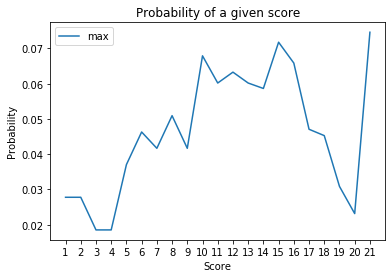

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import csv

data = np.genfromtxt(prob_score_file, delimiter=',',skip_header=1, names=['score', 'prob'])

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("Probability of a given score")
ax1.set_xlabel("Score")
ax1.set_ylabel("Probability")

ax1.set_xticks(np.arange(max_score)+1)

ax1.plot(data['score'], data['prob'], label="max")

leg = ax1.legend()

plt.show()